## Pandas在工作中的应用

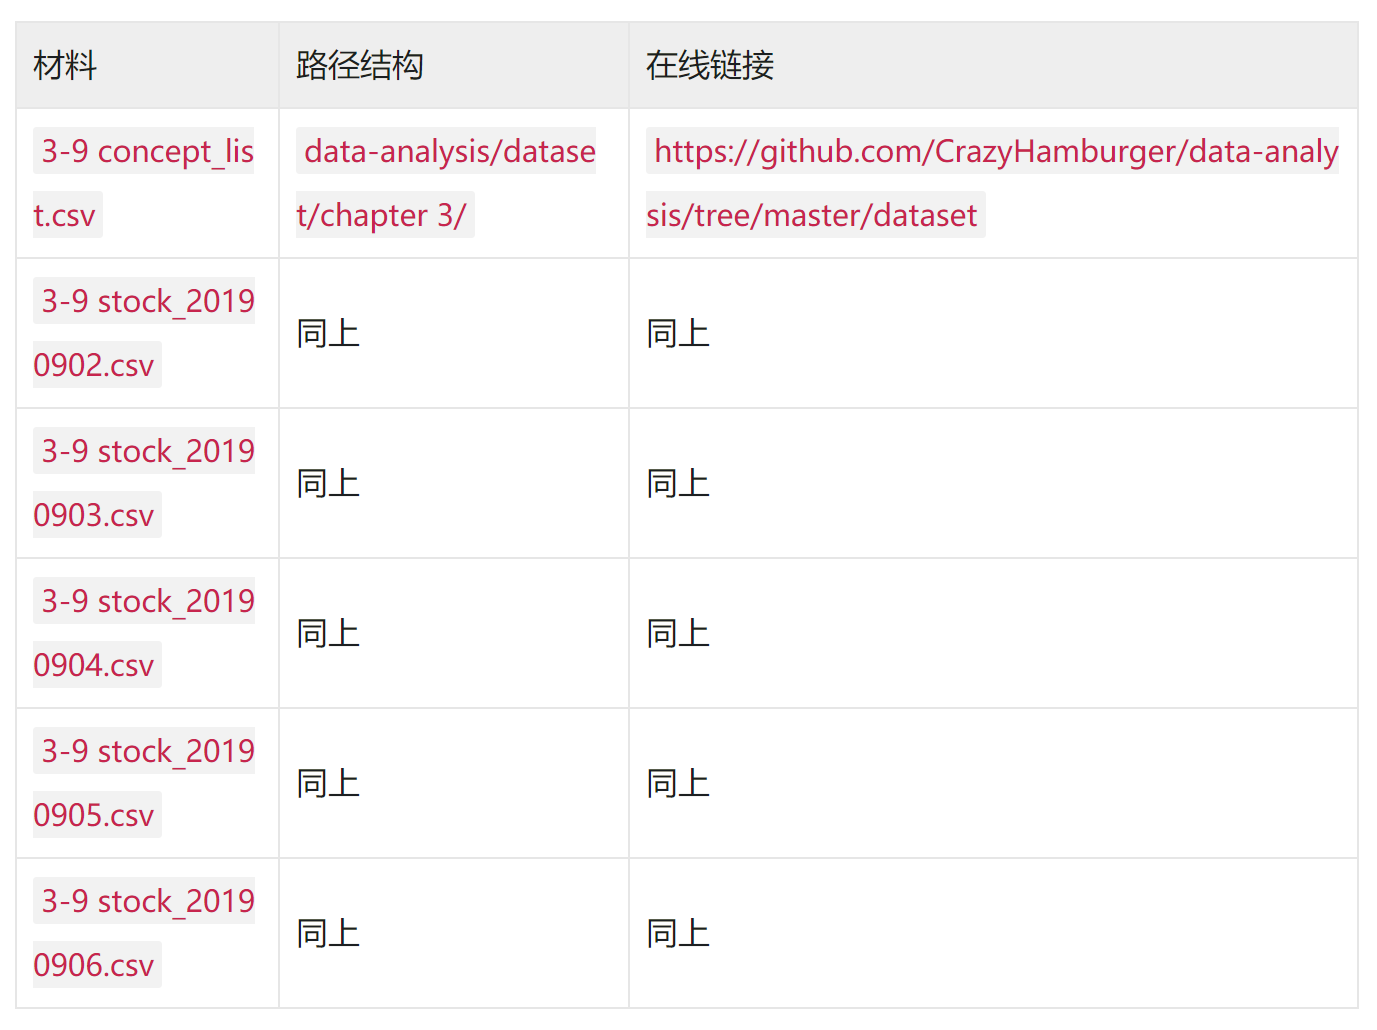

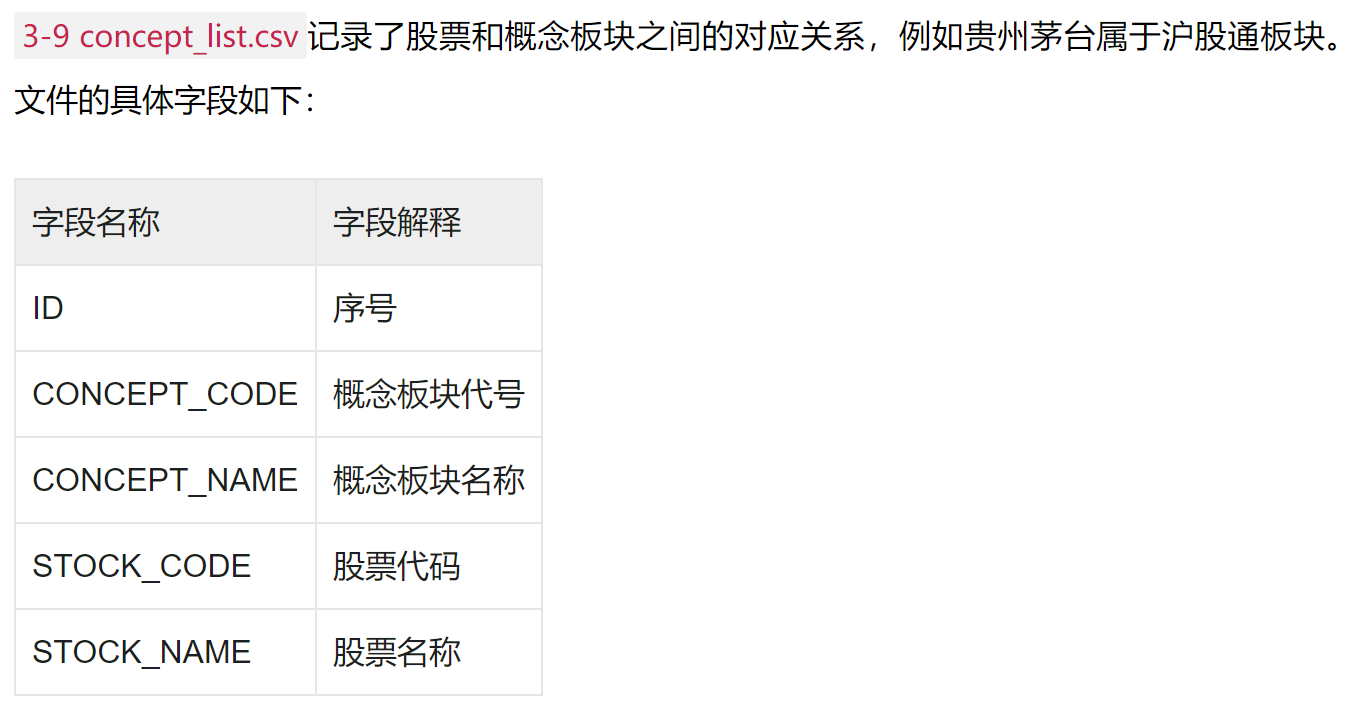

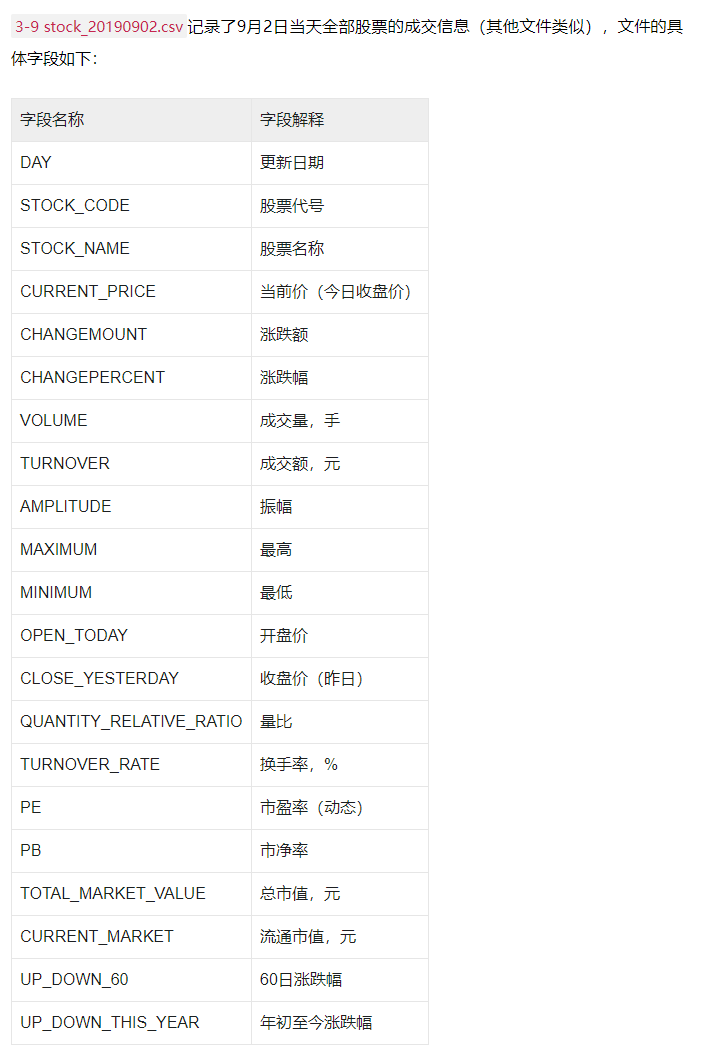

### 数据总览

In [9]:
import pandas as pd
import numpy as np

concept = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 concept_list.csv", dtype=np.str)
concept.head()

,ID,CONCEPT_CODE,CONCEPT_NAME,STOCK_CODE,STOCK_NAME
0,1,BK0709,赛马概念,600533,栖霞建设
1,2,BK0709,赛马概念,000592,平潭发展
2,3,BK0709,赛马概念,600158,中体产业
3,4,BK0709,赛马概念,600555,海航创新
4,5,BK0709,赛马概念,600684,珠江实业


In [10]:
stock_0902 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190902.csv",dtype=np.str)
stock_0902.head()

,DAY,STOCK_CODE,STOCK_NAME,CURRENT_PRICE,CHANGEMOUNT,CHANGEPERCENT,VOLUME,TURNOVER,AMPLITUDE,MAXIMUM,MINIMUM,OPEN_TODAY,CLOSE_YESTERDAY,QUANTITY_RELATIVE_RATIO,TURNOVER_RATE,PE,PB,TOTAL_MARKET_VALUE,CURRENT_MARKET,UP_DOWN_60,UP_DOWN_THIS_YEAR
0,20190902,300337,银邦股份,3.70,0.34,10.12%,62323,23059498,0.00%,3.70,3.70,3.70,3.36,0.31,0.88,-,2.14,3041104039,2618750336,-2.63%,7.25%
1,20190902,600821,津劝业,4.58,0.42,10.10%,13088,5994304,0.00%,4.58,4.58,4.58,4.16,0.34,0.31,-,11.95,1906508439,1906508434,6.51%,14.21%
2,20190902,000673,当代东方,3.16,0.29,10.10%,224496,70294689,9.41%,3.16,2.89,2.90,2.87,1.58,2.84,-,5.00,2501299465,2494852780,-18.13%,-32.62%
3,20190902,002098,浔兴股份,5.56,0.51,10.10%,58549,31911646,9.50%,5.56,5.08,5.15,5.05,0.88,1.64,22.05,3.27,1990479980,1990479980,-13.26%,-35.5%
4,20190902,300006,莱美药业,4.91,0.45,10.09%,502073,241310960,9.87%,4.91,4.47,4.47,4.46,1.88,7.48,37.02,2.38,3988104193,3296326748,-1.21%,35.26%


### 单只股票的数据分析

#### 读取文件，并提取关键股票信息

In [11]:
concept = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 concept_list.csv", dtype=np.str)
stock_0902 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190902.csv", dtype=np.str)
stock_0903 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190903.csv", dtype=np.str)
stock_0904 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190904.csv", dtype=np.str)
stock_0905 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190905.csv", dtype=np.str)
stock_0906 = pd.read_csv(r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-9 stock_20190906.csv", dtype=np.str)
# 定义目标股票
stock = "科大讯飞"

In [12]:
frame_002230 = pd.concat([
            stock_0902[stock_0902["STOCK_NAME"] == stock],
            stock_0903[stock_0903["STOCK_NAME"] == stock],
            stock_0904[stock_0904["STOCK_NAME"] == stock],
            stock_0905[stock_0905["STOCK_NAME"] == stock],
            stock_0906[stock_0906["STOCK_NAME"] == stock]
        ],
        axis=0)
frame_002230

,DAY,STOCK_CODE,STOCK_NAME,CURRENT_PRICE,CHANGEMOUNT,CHANGEPERCENT,VOLUME,TURNOVER,AMPLITUDE,MAXIMUM,MINIMUM,OPEN_TODAY,CLOSE_YESTERDAY,QUANTITY_RELATIVE_RATIO,TURNOVER_RATE,PE,PB,TOTAL_MARKET_VALUE,CURRENT_MARKET,UP_DOWN_60,UP_DOWN_THIS_YEAR
788,20190902,002230,科大讯飞,34.00,1.10,3.34%,436867,1468234160,4.74%,34.18,32.62,32.94,32.90,0.96,2.37,197.46,6.54,74818036728,62691154592,14.33%,35.06%
2478,20190903,002230,科大讯飞,33.93,-0.07,-0.21%,318854,1083354592,1.85%,34.26,33.63,33.94,34.00,0.65,1.73,197.05,6.53,74664000265,62562085131,16.56%,35.54%
1045,20190904,002230,科大讯飞,34.35,0.42,1.24%,420362,1438801440,2.59%,34.68,33.80,33.92,33.93,1.06,2.28,199.49,6.61,75588219042,63336501899,15.12%,35.34%
1096,20190905,002230,科大讯飞,34.75,0.40,1.16%,721453,2516970128,3.99%,35.59,34.22,34.56,34.35,1.84,3.91,201.81,6.69,76468434597,64074047708,23.12%,40.77%
2002,20190906,002230,科大讯飞,34.76,0.01,0.03%,412791,1435773952,3.45%,35.45,34.25,35.13,34.75,0.87,2.24,201.87,6.69,76490436208,64092483188,19.86%,38.82%


#### 计算周期内的最高最低价、振幅

In [13]:
frame_002230.set_index("DAY", inplace=True)

In [19]:
frame_002230[["CURRENT_PRICE", "VOLUME", "TURNOVER", "MAXIMUM", "MINIMUM", 
              "OPEN_TODAY", "CLOSE_YESTERDAY", "CURRENT_MARKET"]]= frame_002230[["CURRENT_PRICE", "VOLUME",
                "TURNOVER", "MAXIMUM", "MINIMUM", "OPEN_TODAY","CLOSE_YESTERDAY", "CURRENT_MARKET"]].astype(float)

In [27]:
maximum_w = frame_002230["MAXIMUM"].max()
minimum_w = frame_002230["MINIMUM"].min()
# 计算周期内的最高价
maximum_w

35.59

In [28]:
# 计算周期内的最低价
minimum_w

32.62

In [29]:
# 计算最大振幅
amplitude_w = (maximum_w - minimum_w)/(frame_002230.loc["20190902"]["CLOSE_YESTERDAY"])
amplitude_w

0.09027355623100322

In [30]:
print("科大讯飞2019年9月2-6日股票最高价为%.2f元，股票最低价为%.2f元，股票最大振幅为%.2f" %
      (maximum_w, minimum_w, amplitude_w*100) + "%.")

科大讯飞2019年9月2-6日股票最高价为35.59元，股票最低价为32.62元，股票最大振幅为9.03%.


#### 计算周期内的累积成交量、累积成交额

In [32]:
volume_w = frame_002230["VOLUME"].sum()/10**4     # 单位:万手
volume_w

231.0327

In [34]:
turnover_w = frame_002230["TURNOVER"].sum()/10**8
turnover_w

79.43134272

In [35]:
print("科大讯飞2019年9月2-6日股票累积成交%.2f万手，累积成交额%.2f亿元" % (volume_w, turnover_w))

科大讯飞2019年9月2-6日股票累积成交231.03万手，累积成交额79.43亿元


#### 计算周期内的开盘价、收盘价，涨跌幅

In [36]:
open_w = frame_002230.loc["20190902"]["OPEN_TODAY"]
close_w = frame_002230.loc["20190906"]["CURRENT_PRICE"]
changemount_w = close_w - open_w
changepercent_w = changemount_w / (frame_002230.loc["20190902"]["CLOSE_YESTERDAY"])

In [39]:
print("科大讯飞2019年9月2-6日股票开盘%.2f元，收盘%.2f元，涨跌%.2f元，涨跌幅%.2f" % 
      (open_w, close_w, changemount_w, changepercent_w*100) + "%。")

科大讯飞2019年9月2-6日股票开盘32.94元，收盘34.76元，涨跌1.82元，涨跌幅5.53%。


#### 最新流通市值

In [40]:
# 选取最后一天的流通市值为最新指标
market_w = frame_002230.loc["20190906"]["CURRENT_MARKET"]

In [41]:
print("科大讯飞2019年9月6日最新流通市值为%.2f亿元" % (market_w/10**8))

科大讯飞2019年9月6日最新流通市值为640.92亿元


### 基于股票板块的报表分析

#### 查看股票池

In [43]:
concept[concept["CONCEPT_NAME"] == "人工智能"].shape

(84, 5)

#### 筛选目标数据源

In [44]:
# step 1: 把全部股票交易数据进行合并
frame_STOCK = pd.concat([stock_0902, stock_0903, stock_0904, stock_0905, stock_0906], axis=0)

In [45]:
# step 2: 根据人工智能板块的股票池，筛选出归属于人工智能板块的股票交易信息
frame_AI = pd.merge(frame_STOCK, concept[concept["CONCEPT_NAME"] == "人工智能"], 
         on=["STOCK_NAME", "STOCK_CODE"], how="inner")

In [46]:
# step 3: 初步清洗：去除‘-’，并进行排序，按照时间和stock_code进行
frame_AI.replace("-", np.nan, inplace=True)
frame_AI.sort_values(["STOCK_CODE", "DAY"], inplace=True)

In [47]:
# step 4： 更改关键指标为float类型，供后续计算
frame_AI[["CURRENT_PRICE", "VOLUME", "TURNOVER", "MAXIMUM", "MINIMUM", "OPEN_TODAY", "CLOSE_YESTERDAY",
          "CURRENT_MARKET"]] = frame_AI[["CURRENT_PRICE", "VOLUME", "TURNOVER", "MAXIMUM",
        "MINIMUM", "OPEN_TODAY", "CLOSE_YESTERDAY", "CURRENT_MARKET"]].astype(np.float)

#### 计算最高、最低价、累积成交量、累积成交额、开盘价、收盘价，上个周期收盘价（供计算涨跌幅用）、最新流通市值

In [48]:
frame_AI

,DAY,STOCK_CODE,STOCK_NAME,CURRENT_PRICE,CHANGEMOUNT,CHANGEPERCENT,VOLUME,TURNOVER,AMPLITUDE,MAXIMUM,MINIMUM,OPEN_TODAY,CLOSE_YESTERDAY,QUANTITY_RELATIVE_RATIO,TURNOVER_RATE,PE,PB,TOTAL_MARKET_VALUE,CURRENT_MARKET,UP_DOWN_60,UP_DOWN_THIS_YEAR,ID,CONCEPT_CODE,CONCEPT_NAME
0,20190902,000066,中国长城,11.73,1.07,10.04%,2674330.0,3.024145e+09,10.04%,11.73,10.66,10.81,10.66,1.32,10.74,119.77,5.50,34347574141,2.921594e+10,24.65%,149.04%,7880,BK0800,人工智能
1,20190903,000066,中国长城,12.63,0.90,7.67%,3694806.0,4.572387e+09,10.91%,12.90,11.62,11.88,11.73,1.59,14.83,128.96,5.92,36982939664,3.145757e+10,36.01%,173.46%,7880,BK0800,人工智能
2,20190904,000066,中国长城,12.61,-0.02,-0.16%,2540630.0,3.189044e+09,6.33%,12.92,12.12,12.50,12.63,0.96,10.20,128.75,5.91,36924374683,3.140776e+10,34.15%,167.73%,7880,BK0800,人工智能
3,20190905,000066,中国长城,12.55,-0.06,-0.48%,2703369.0,3.453189e+09,8.72%,13.45,12.35,12.60,12.61,0.95,10.85,128.14,5.88,36748685324,3.125831e+10,40.13%,169.85%,7880,BK0800,人工智能
4,20190906,000066,中国长城,12.51,-0.04,-0.32%,1622309.0,2.025503e+09,4.94%,12.85,12.23,12.55,12.55,0.57,6.51,127.73,5.86,36631558153,3.115869e+10,38.08%,165.61%,7880,BK0800,人工智能
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,20190902,603986,兆易创新,137.28,5.73,4.36%,99636.0,1.310436e+09,9.49%,138.00,125.51,130.24,131.55,1.00,3.53,117.35,9.68,44003544520,3.874291e+10,75.38%,129.63%,7844,BK0800,人工智能
116,20190903,603986,兆易创新,143.95,6.67,4.86%,95672.0,1.376808e+09,10.58%,150.50,135.98,137.28,137.28,0.88,3.39,123.05,10.15,46141536682,4.062531e+10,84.72%,140.72%,7844,BK0800,人工智能
117,20190904,603986,兆易创新,144.77,0.82,0.57%,72234.0,1.027168e+09,4.95%,145.82,138.70,144.07,143.95,0.67,2.56,123.75,10.21,46404380717,4.085673e+10,83.21%,142.09%,7844,BK0800,人工智能
118,20190905,603986,兆易创新,141.90,-2.87,-1.98%,78154.0,1.128568e+09,5.26%,149.25,141.63,146.30,144.77,0.79,2.77,121.30,10.01,45484431485,4.004676e+10,79.74%,137.29%,7844,BK0800,人工智能


In [49]:
# 根据排序的规则，选择第一行指标（比如可以查看周期内的开盘价）
def top_most(arr):
    if arr.size>0:
        return arr.iloc[0]
    else:
        np.nan

# 根据排序的规则，选择最后一行指标（比如可以查看周期内的收盘价、最新市值等）
def last_most(arr):
    if arr.size>0:
        return arr.iloc[-1]
    else:
        return np.nan

In [55]:
frame_report = frame_AI.groupby(["STOCK_CODE", "STOCK_NAME"]).agg({
    "MAXIMUM": np.max,      # 计算最高价
    "MINIMUM": np.min,      # 计算最低价
    "VOLUME": np.sum,       # 计算累积成交量
    "TURNOVER": np.sum,     # 计算累积成交额
    "OPEN_TODAY": top_most,   # 计算周期内的开盘价
    "CURRENT_PRICE": last_most,  # 计算周期内的收盘价
    "CLOSE_YESTERDAY": top_most,   # 计算上个周期内的收盘价
    "CURRENT_MARKET": last_most    # 计算周期内最新流通市值
}).reset_index()

In [56]:
frame_report

,STOCK_CODE,STOCK_NAME,MAXIMUM,MINIMUM,VOLUME,TURNOVER,OPEN_TODAY,CURRENT_PRICE,CLOSE_YESTERDAY,CURRENT_MARKET
0,000066,中国长城,13.45,10.66,13235444.0,1.626427e+10,10.81,12.51,10.66,3.115869e+10
1,000625,长安汽车,8.97,7.91,1370820.0,1.156694e+09,7.91,8.80,8.00,3.309575e+10
2,000821,京山轻机,7.38,6.90,221913.0,1.595148e+08,6.99,7.27,6.96,3.285424e+09
3,000938,紫光股份,36.08,32.60,993193.0,3.442921e+09,33.30,34.72,33.13,7.092998e+10
4,000977,浪潮信息,27.76,25.17,3316407.0,8.878259e+09,25.90,26.55,25.50,3.422964e+10
...,...,...,...,...,...,...,...,...,...,...
76,603160,汇顶科技,205.88,186.50,338959.0,6.689656e+09,193.90,189.44,197.01,4.423265e+10
77,603486,科沃斯,26.88,24.56,262585.0,6.631020e+08,25.21,24.76,25.25,4.448103e+09
78,603660,苏州科达,12.77,11.56,715364.0,8.828792e+08,11.76,12.65,11.76,4.206578e+09
79,603869,新智认知,12.22,10.85,217667.0,2.524287e+08,10.88,12.11,10.93,4.951848e+09


In [57]:
frame_report.rename(columns = {
    "MAXIMUM": "maximum_w", 
    "MINIMUM": "minimum_w", 
    "VOLUME": "volume_w", 
    "TURNOVER": "turnover_w", 
    "OPEN_TODAY": "open_w", 
    "CURRENT_PRICE": "close_w", 
    "CLOSE_YESTERDAY": "close_last_w", 
    "CURRENT_MARKET": "market_w", 
}, inplace=True)

In [58]:
frame_report

,STOCK_CODE,STOCK_NAME,maximum_w,minimum_w,volume_w,turnover_w,open_w,close_w,close_last_w,market_w
0,000066,中国长城,13.45,10.66,13235444.0,1.626427e+10,10.81,12.51,10.66,3.115869e+10
1,000625,长安汽车,8.97,7.91,1370820.0,1.156694e+09,7.91,8.80,8.00,3.309575e+10
2,000821,京山轻机,7.38,6.90,221913.0,1.595148e+08,6.99,7.27,6.96,3.285424e+09
3,000938,紫光股份,36.08,32.60,993193.0,3.442921e+09,33.30,34.72,33.13,7.092998e+10
4,000977,浪潮信息,27.76,25.17,3316407.0,8.878259e+09,25.90,26.55,25.50,3.422964e+10
...,...,...,...,...,...,...,...,...,...,...
76,603160,汇顶科技,205.88,186.50,338959.0,6.689656e+09,193.90,189.44,197.01,4.423265e+10
77,603486,科沃斯,26.88,24.56,262585.0,6.631020e+08,25.21,24.76,25.25,4.448103e+09
78,603660,苏州科达,12.77,11.56,715364.0,8.828792e+08,11.76,12.65,11.76,4.206578e+09
79,603869,新智认知,12.22,10.85,217667.0,2.524287e+08,10.88,12.11,10.93,4.951848e+09


#### 计算最大振幅、涨跌额和涨跌幅

In [60]:
# 计算最大振幅
frame_report["amplitude_w"] = frame_report.apply(
    lambda x:(x.maximum_w - x.minimum_w)/x.close_last_w if pd.notnull(x.maximum_w) and pd.notnull(x.minimum_w) and pd.notnull(x.close_last_w) else np.nan, axis=1)


In [61]:
# 计算周期内涨跌额
frame_report["changemount_w"] = frame_report.apply(
    lambda x:x.close_w-x.open_w if pd.notnull(x.close_w) and pd.notnull(x.open_w) else np.nan, axis=1)

In [62]:
# 计算周期内涨跌幅
frame_report["changepercent_w"] = frame_report.apply(
    lambda x: x.changemount_w/x.close_last_w if pd.notnull(x.changemount_w) and pd.notnull(x.close_last_w) else np.nan, axis=1)

In [63]:
frame_report 

,STOCK_CODE,STOCK_NAME,maximum_w,minimum_w,volume_w,turnover_w,open_w,close_w,close_last_w,market_w,amplitude_w,changemount_w,changepercent_w
0,000066,中国长城,13.45,10.66,13235444.0,1.626427e+10,10.81,12.51,10.66,3.115869e+10,0.261726,1.70,0.159475
1,000625,长安汽车,8.97,7.91,1370820.0,1.156694e+09,7.91,8.80,8.00,3.309575e+10,0.132500,0.89,0.111250
2,000821,京山轻机,7.38,6.90,221913.0,1.595148e+08,6.99,7.27,6.96,3.285424e+09,0.068966,0.28,0.040230
3,000938,紫光股份,36.08,32.60,993193.0,3.442921e+09,33.30,34.72,33.13,7.092998e+10,0.105041,1.42,0.042861
4,000977,浪潮信息,27.76,25.17,3316407.0,8.878259e+09,25.90,26.55,25.50,3.422964e+10,0.101569,0.65,0.025490
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,603160,汇顶科技,205.88,186.50,338959.0,6.689656e+09,193.90,189.44,197.01,4.423265e+10,0.098371,-4.46,-0.022638
77,603486,科沃斯,26.88,24.56,262585.0,6.631020e+08,25.21,24.76,25.25,4.448103e+09,0.091881,-0.45,-0.017822
78,603660,苏州科达,12.77,11.56,715364.0,8.828792e+08,11.76,12.65,11.76,4.206578e+09,0.102891,0.89,0.075680
79,603869,新智认知,12.22,10.85,217667.0,2.524287e+08,10.88,12.11,10.93,4.951848e+09,0.125343,1.23,0.112534


#### 单位换算

In [64]:
# 成交量单位：万手
frame_report["volume_w"] = frame_report["volume_w"]/10000
# 成交额单位：亿元
frame_report["turnover_w"] = frame_report["turnover_w"]/10**8
# 流通市值单位：亿元
frame_report["market_w"] = frame_report["market_w"]/10**8

#### 设置小数点格式

In [65]:
# 对于小数位，保留2位小数
frame_report[["maximum_w", "minimum_w", "volume_w", "turnover_w", "open_w", "close_w", "close_last_w", "market_w", "changemount_w"]] = frame_report[["maximum_w", "minimum_w", "volume_w", "turnover_w", "open_w", "close_w", "close_last_w", "market_w", 
"changemount_w"]].round(2)

# 对于部分数据，例如涨幅，转化为百分位数，并保留2位小数
frame_report[["changepercent_w", "amplitude_w"]] = frame_report[["changepercent_w", "amplitude_w"]].round(4)*100

In [66]:
frame_report

,STOCK_CODE,STOCK_NAME,maximum_w,minimum_w,volume_w,turnover_w,open_w,close_w,close_last_w,market_w,amplitude_w,changemount_w,changepercent_w
0,000066,中国长城,13.45,10.66,1323.54,162.64,10.81,12.51,10.66,311.59,26.17,1.70,15.95
1,000625,长安汽车,8.97,7.91,137.08,11.57,7.91,8.80,8.00,330.96,13.25,0.89,11.13
2,000821,京山轻机,7.38,6.90,22.19,1.60,6.99,7.27,6.96,32.85,6.90,0.28,4.02
3,000938,紫光股份,36.08,32.60,99.32,34.43,33.30,34.72,33.13,709.30,10.50,1.42,4.29
4,000977,浪潮信息,27.76,25.17,331.64,88.78,25.90,26.55,25.50,342.30,10.16,0.65,2.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,603160,汇顶科技,205.88,186.50,33.90,66.90,193.90,189.44,197.01,442.33,9.84,-4.46,-2.26
77,603486,科沃斯,26.88,24.56,26.26,6.63,25.21,24.76,25.25,44.48,9.19,-0.45,-1.78
78,603660,苏州科达,12.77,11.56,71.54,8.83,11.76,12.65,11.76,42.07,10.29,0.89,7.57
79,603869,新智认知,12.22,10.85,21.77,2.52,10.88,12.11,10.93,49.52,12.53,1.23,11.25


In [67]:
# 查看一周上涨在20%以上的股票
frame_report[frame_report['changepercent_w']>20]

,STOCK_CODE,STOCK_NAME,maximum_w,minimum_w,volume_w,turnover_w,open_w,close_w,close_last_w,market_w,amplitude_w,changemount_w,changepercent_w
33,300033,同花顺,124.99,89.18,101.14,107.98,89.18,123.58,89.06,326.62,40.21,34.40,38.63
52,300367,东方网力,6.85,5.39,274.64,16.96,5.46,6.58,5.50,54.95,26.55,1.12,20.36
53,300379,东方通,33.40,22.20,178.38,49.70,22.50,30.55,21.90,70.41,51.14,8.05,36.76
65,600446,金证股份,25.61,20.45,388.40,90.86,20.48,24.83,20.43,211.85,25.26,4.35,21.29
70,600745,闻泰科技,69.10,50.28,117.74,77.77,50.28,66.14,45.71,421.49,41.17,15.86,34.70
